<a href="https://colab.research.google.com/github/Annada234/Annada234/blob/main/ADLAB3%264.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

LAB3

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import kagglehub

In [ ]:
import kagglehub
path = kagglehub.dataset_download("nabeelqureshitiii/student-performance-dataset")

Using Colab cache for faster access to the 'student-performance-dataset' dataset.


In [ ]:
path = kagglehub.dataset_download("nabeelqureshitiii/student-performance-dataset")

Using Colab cache for faster access to the 'student-performance-dataset' dataset.


In [ ]:
import os

for root, dirs, files in os.walk(path, topdown=True):
    for file in files:
        print(os.path.join(root, file))


/kaggle/input/student-performance-dataset/student_performance.csv


In [ ]:
df = pd.read_csv(path + "/student_performance.csv")


In [ ]:
df = pd.read_csv(path + "/student_performance.csv")
display(df.head())


,student_id,weekly_self_study_hours,attendance_percentage,class_participation,total_score,grade
0,1,18.5,95.6,3.8,97.9,A
1,2,14.0,80.0,2.5,83.9,B
2,3,19.5,86.3,5.3,100.0,A
3,4,25.7,70.2,7.0,100.0,A
4,5,13.4,81.9,6.9,92.0,A


In [ ]:
df.columns


Index(['student_id', 'weekly_self_study_hours', 'attendance_percentage',
       'class_participation', 'total_score', 'grade'],
      dtype='object')

In [ ]:
X = df[['weekly_self_study_hours', 'attendance_percentage', 'total_score']]
grade_mapping = {'A': 5, 'B': 4, 'C': 3, 'D': 2, 'F': 1}
y = df['grade'].map(grade_mapping)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:

if y_train.dtype == 'object':
    y_train = y_train.map(grade_mapping)
if y_test.dtype == 'object':
    y_test = y_test.map(grade_mapping)

model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [ ]:
y_pred = model.predict(X_test)


In [ ]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R² Score:", r2)

Mean Squared Error: 0.0764743944951457
R² Score: 0.9085632400891728


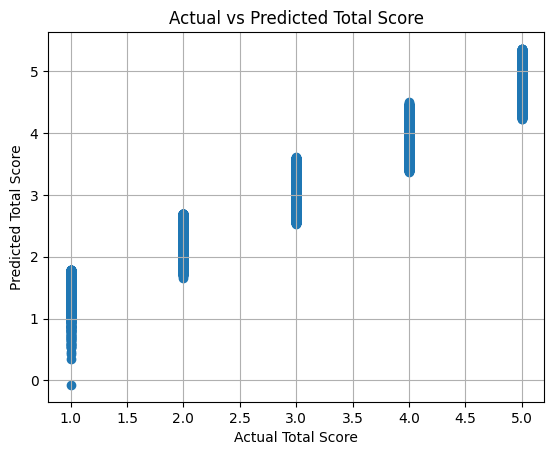

In [ ]:
plt.scatter(y_test, y_pred)
plt.xlabel("Actual Total Score")
plt.ylabel("Predicted Total Score")
plt.title("Actual vs Predicted Total Score")
plt.grid(True)
plt.show()

In [ ]:
coef_df = pd.DataFrame(model.coef_, X.columns, columns=['Coefficient'])
print("\nModel Coefficients:")
display(coef_df)


Model Coefficients:


,Coefficient
weekly_self_study_hours,-0.011763
attendance_percentage,-0.000016
total_score,0.060716


LAB4

In [ ]:
import kagglehub
path = kagglehub.dataset_download("denizdagli1/spambase")


100%|██████████| 133k/133k [00:00<00:00, 432kB/s]

Extracting files...


In [ ]:
import kagglehub
path = kagglehub.dataset_download("denizdagli1/spambase")


Using Colab cache for faster access to the 'spambase' dataset.


In [ ]:
import os

for root, dirs, files in os.walk(path, topdown=True):
    for file in files:
        print(os.path.join(root, file))


/kaggle/input/spambase/spambase_updated.csv


In [ ]:
import pandas as pd

df = pd.read_csv(path + "/spambase_updated.csv")
display(df.head())
display(df.columns)


,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,...,char_freq_;,char_freq_(,char_freq_[,char_freq_!,char_freq_$,char_freq_#,capital_run_length_average,capital_run_length_longest,capital_run_length_total,spam
0,0.00,0.64,0.64,0.0,0.32,0.00,0.00,0.00,0.00,0.00,...,0.00,0.000,0.0,0.778,0.000,0.000,3.756,61,278,1
1,0.21,0.28,0.50,0.0,0.14,0.28,0.21,0.07,0.00,0.94,...,0.00,0.132,0.0,0.372,0.180,0.048,5.114,101,1028,1
2,0.06,0.00,0.71,0.0,1.23,0.19,0.19,0.12,0.64,0.25,...,0.01,0.143,0.0,0.276,0.184,0.010,9.821,485,2259,1
3,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.00,0.137,0.0,0.137,0.000,0.000,3.537,40,191,1
4,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.00,0.135,0.0,0.135,0.000,0.000,3.537,40,191,1


Index(['word_freq_make', 'word_freq_address', 'word_freq_all', 'word_freq_3d',
       'word_freq_our', 'word_freq_over', 'word_freq_remove',
       'word_freq_internet', 'word_freq_order', 'word_freq_mail',
       'word_freq_receive', 'word_freq_will', 'word_freq_people',
       'word_freq_report', 'word_freq_addresses', 'word_freq_free',
       'word_freq_business', 'word_freq_email', 'word_freq_you',
       'word_freq_credit', 'word_freq_your', 'word_freq_font', 'word_freq_000',
       'word_freq_money', 'word_freq_hp', 'word_freq_hpl', 'word_freq_george',
       'word_freq_650', 'word_freq_lab', 'word_freq_labs', 'word_freq_telnet',
       'word_freq_857', 'word_freq_data', 'word_freq_415', 'word_freq_85',
       'word_freq_technology', 'word_freq_1999', 'word_freq_parts',
       'word_freq_pm', 'word_freq_direct', 'word_freq_cs', 'word_freq_meeting',
       'word_freq_original', 'word_freq_project', 'word_freq_re',
       'word_freq_edu', 'word_freq_table', 'word_freq_conference',


In [ ]:
X = df.drop('spam', axis=1)
y = df['spam']


In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42)


In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
X_test

array([[-0.335858  , -0.16038486, -0.55029963, ..., -0.12750747,
        -0.23932309, -0.47700855],
       [ 1.97858184, -0.16038486,  0.83181229, ..., -0.12653274,
        -0.23476215, -0.42696877],
       [-0.335858  , -0.16038486,  1.22113959, ..., -0.11776022,
        -0.21195747, -0.30445759],
       ...,
       [ 0.05531493, -0.06363866, -0.08310687, ..., -0.08635583,
         0.07082057, -0.04390564],
       [-0.335858  ,  0.48458976, -0.55029963, ..., -0.11593262,
        -0.22564028, -0.4321453 ],
       [-0.335858  , -0.16038486, -0.55029963, ..., -0.0981439 ,
        -0.18915279, -0.29237902]])

In [ ]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)


LogisticRegression(max_iter=1000)

In [ ]:
y_pred = model.predict(X_test)

In [ ]:
print(y_pred)


[0 0 0 ... 1 1 0]


In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.9232440260680667

Confusion Matrix:
 [[769  35]
 [ 71 506]]

Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.96      0.94       804
           1       0.94      0.88      0.91       577

    accuracy                           0.92      1381
   macro avg       0.93      0.92      0.92      1381
weighted avg       0.92      0.92      0.92      1381

